# Übung -STdWZM- Lagesollwertbildung

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.matlib as ml
import collections

plt.rcParams['figure.figsize'] = (18,5)

font = {'size'   : 15}
plt.rc('font', **font)


# Aufgabe 1

# Aufgabe 2

# a)

In [130]:
P0 = np.array([1,2])
P1 = np.array([4,4])
P2 = np.array([6,3])

In [131]:
Tau_equal = np.array([0,0.5,1])

A = np.array([[Tau_equal[0]**0,Tau_equal[0]**1,Tau_equal[0]**2],
              [Tau_equal[1]**0,Tau_equal[1]**1,Tau_equal[1]**2],
              [Tau_equal[2]**0,Tau_equal[2]**1,Tau_equal[2]**2]])

P = np.array([P0,P1,P2])

C_equal = np.flip(np.transpose(np.dot(la.pinv(A),P)),1)

print(C_equal)

tau = np.linspace(0,1,num=100)

f1 = np.array([np.polyval(C_equal[0,:],tau),np.polyval(C_equal[1,:],tau)])


[[-2.  7.  1.]
 [-6.  7.  2.]]


In [132]:
Tau_chordal = np.array([0,la.norm(P1-P0)/(la.norm(P1-P0)+la.norm(P2-P1)),1])

A = np.array([[Tau_chordal[0]**0,Tau_chordal[0]**1,Tau_chordal[0]**2],
              [Tau_chordal[1]**0,Tau_chordal[1]**1,Tau_chordal[1]**2],
              [Tau_chordal[2]**0,Tau_chordal[2]**1,Tau_chordal[2]**2]])

P = np.array([P0,P1,P2])

C_chordal = np.flip(np.transpose(np.dot(la.pinv(A),P)),1)

print(C_chordal)

tau = np.linspace(0,1,num=100)

f2 = np.array([np.polyval(C_chordal[0,:],tau),np.polyval(C_chordal[1,:],tau)])

[[ 0.36438208  4.63561792  1.        ]
 [-5.8527989   6.8527989   2.        ]]


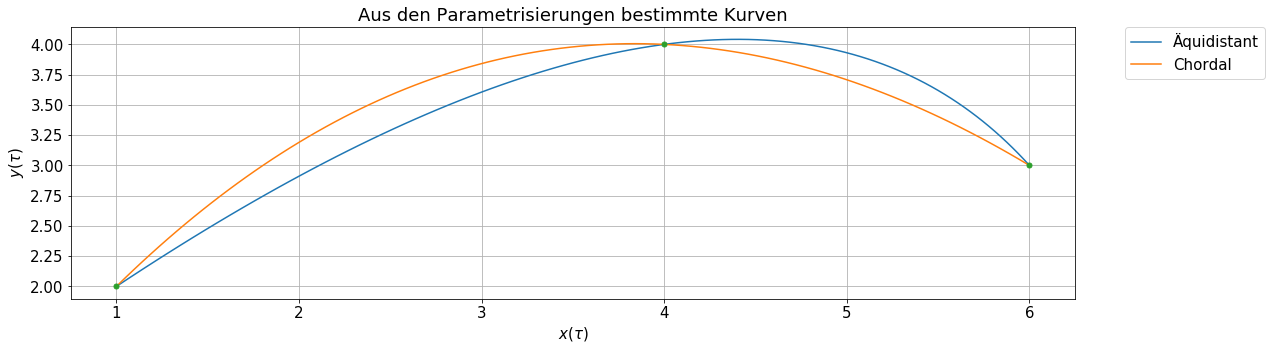

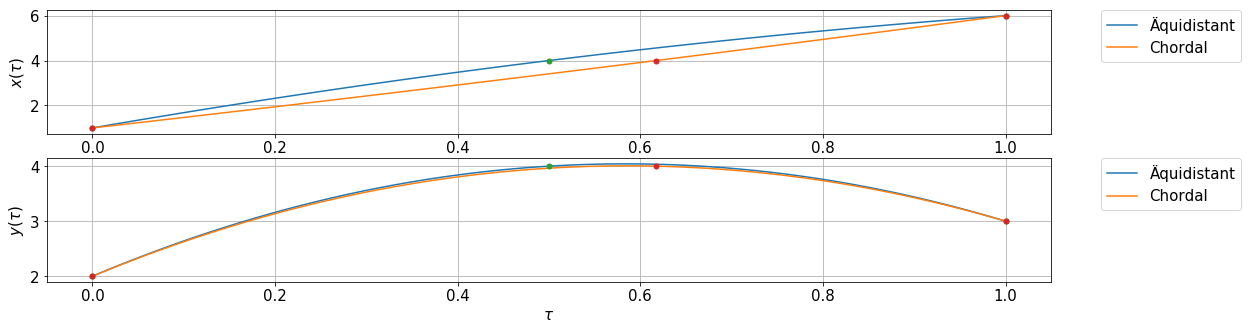

In [133]:

fig, (ax) = plt.subplots();
ax.plot(f1[0,:], f1[1,:],label="Äquidistant");
ax.plot(f2[0,:], f2[1,:],label="Chordal");
ax.plot(P[:,0],P[:,1],marker='o',linestyle = 'None', markersize = 5)
ax.set(xlabel=r'$x(\tau)$', ylabel=r'$y(\tau)$',
       title='Aus den Parametrisierungen bestimmte Kurven')
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig, (ax2,ax3) = plt.subplots(2,1);
ax2.plot(tau, f1[0,:],label="Äquidistant");
ax2.plot(tau, f2[0,:],label="Chordal");
ax2.set(xlabel=r'$\tau$', ylabel=r'$x(\tau)$')
ax2.grid()
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.plot(Tau_equal,P[:,0],marker='o',linestyle = 'None', markersize = 5)
ax2.plot(Tau_chordal,P[:,0],marker='o',linestyle = 'None', markersize = 5)

ax3.plot(tau, f1[1,:],label="Äquidistant");
ax3.plot(tau, f2[1,:],label="Chordal");
ax3.set(xlabel=r'$\tau$', ylabel=r'$y(\tau)$')
ax3.grid()
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax3.plot(Tau_equal,P[:,1],marker='o',linestyle = 'None', markersize = 5)
ax3.plot(Tau_chordal,P[:,1],marker='o',linestyle = 'None', markersize = 5)

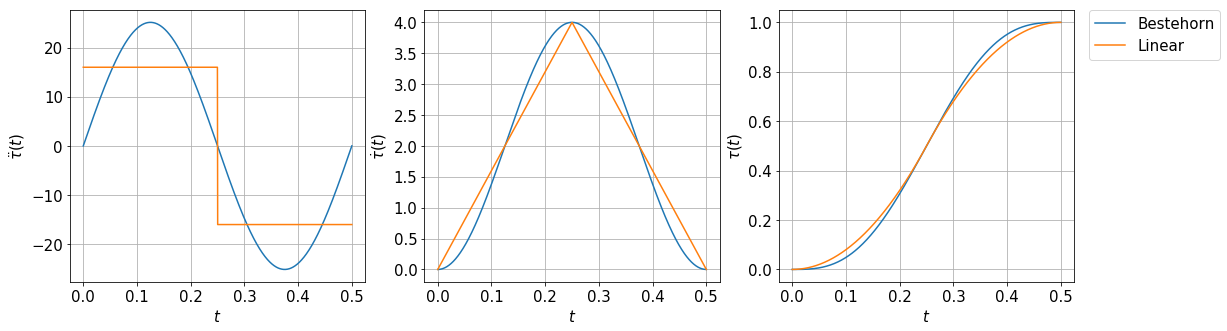

In [134]:

Trajectory = collections.namedtuple('Trajectory', ['ddTau', 'dTau', 'Tau'])

def fun_linear(t):  
    a = 4/(np.max(t)**2)
    c0 = 0
    c1 = 0   
    c2 = 4/(np.max(t))
    c3 = -1
    idx_l = [np.where((t >= 0) & (t <= np.max(t)/2))]
    idx_r = [np.where((t > np.max(t)/2) & (t <= np.max(t)))]
    ddTau = np.zeros(np.size(t))
    ddTau[idx_l] = a
    ddTau[idx_r] = -a
    dTau = np.zeros(np.size(t))
    dTau[idx_l] = a*t[idx_l] + c0
    dTau[idx_r] = -a*t[idx_r] + c2
    Tau = np.zeros(np.size(t))
    Tau[idx_l] = 1/2*a*t[idx_l]**2 + c0*t[idx_l] + c1
    Tau[idx_r] = -1/2*a*t[idx_r]**2 + c2*t[idx_r] + c3
    Lin = Trajectory(ddTau = ddTau, dTau=dTau, Tau=Tau)
    return Lin

def fun_bestehorn(t):  
    a = 1/(np.max(t)**2)
    b = 1/(np.max(t))
    c1 = 1/(np.max(t))
    c2 = 0    
    ddTau = 2*np.pi*a*np.sin(2*np.pi*b*t)
    dTau = c1-a/b*np.cos(2*np.pi*b*t);
    Tau = c1*t+c2-a/(2*np.pi*b**2)*np.sin(2*np.pi*b*t);
    Best = Trajectory(ddTau = ddTau, dTau=dTau, Tau=Tau)
    return Best

t = np.linspace(0,0.5,num=1000);

BestehornProfile = fun_bestehorn(t)
LinearProfile = fun_linear(t)
    
fig, (ax1,ax2,ax3) = plt.subplots(1,3);
ax1.plot(t,BestehornProfile.ddTau)
ax1.plot(t,LinearProfile.ddTau)
ax1.set(xlabel=r'$t$', ylabel=r'$\ddot{\tau}(t)$')
ax1.grid()

ax2.plot(t,BestehornProfile.dTau)
ax2.plot(t,LinearProfile.dTau)
ax2.set(xlabel=r'$t$', ylabel=r'$\dot{\tau}(t)$')
ax2.grid()

ax3.plot(t,BestehornProfile.Tau,label='Bestehorn')
ax3.plot(t,LinearProfile.Tau,label='Linear')
ax3.set(xlabel=r'$t$', ylabel=r'$\tau(t)$')
ax3.grid()
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

[Text(0,0.5,'$\\ddot{v}(t) \\quad in \\quad \\frac{mm}{s^3}$'),
 Text(0.5,0,'$t$')]

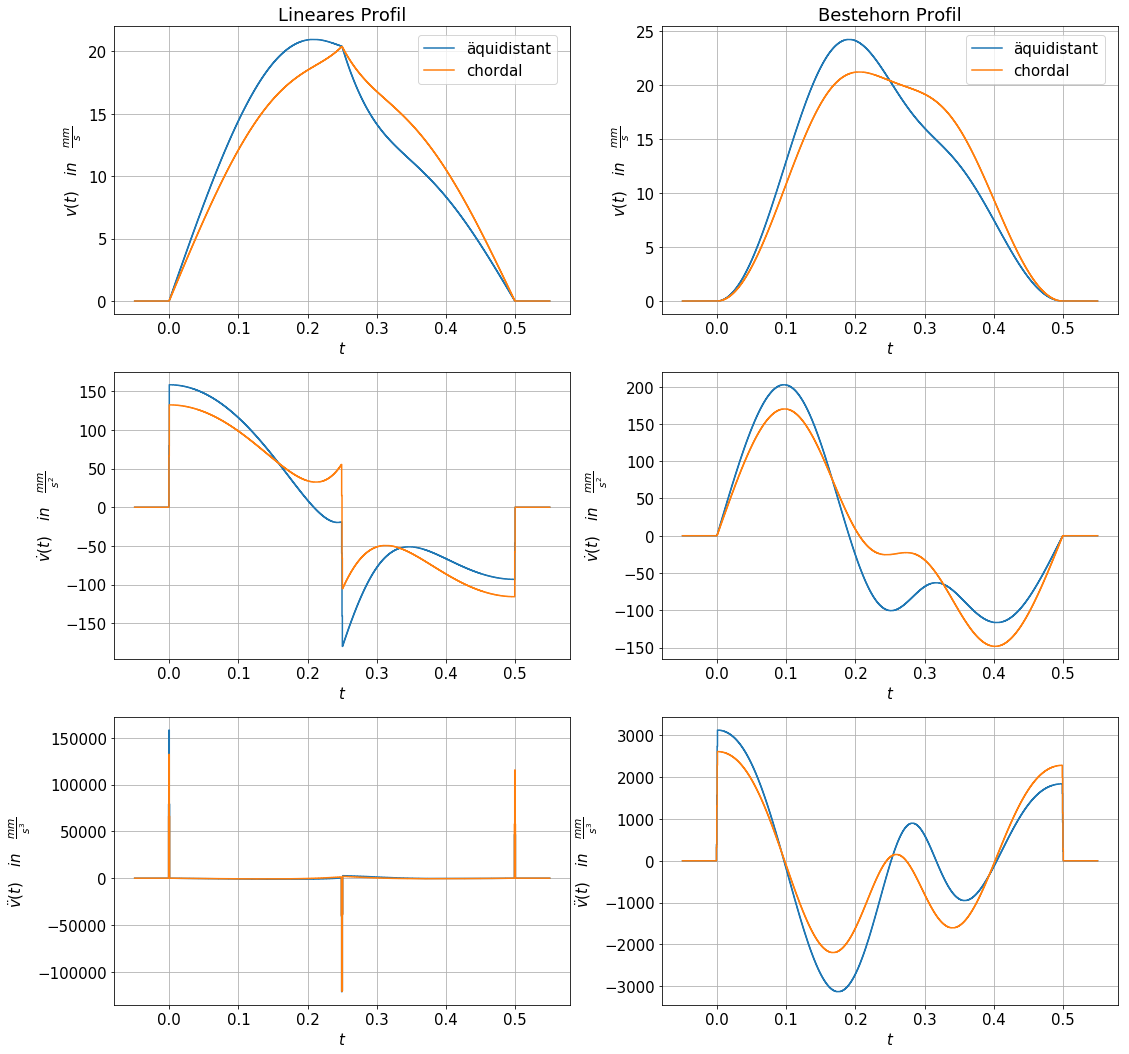

In [179]:
def vBahn(C,ddTau,dTau,Tau):
    vBahn = np.sqrt((C[0,1]+2*C[0,0]*Tau)**2 + (C[1,1]+2*C[1,0]*Tau)**2)*dTau
    return vBahn

steps = 100;
delta = t[1]-t[0]
prev = np.linspace(-steps*delta,-delta,steps)
after = np.linspace(delta,steps*delta,steps)+np.max(t)

t_ext = np.concatenate([prev,t,after])

Tau_ext = np.concatenate([np.zeros(np.size(prev)),LinearProfile.Tau,np.ones(np.size(after))])
dTau_ext = np.concatenate([np.zeros(np.size(prev)),LinearProfile.dTau,np.zeros(np.size(after))])
ddTau_ext = np.concatenate([np.zeros(np.size(prev)),LinearProfile.ddTau,np.zeros(np.size(after))])
LinearProfile_ext = Trajectory(ddTau = ddTau_ext, dTau = dTau_ext, Tau = Tau_ext)

Tau_ext = np.concatenate([np.zeros(np.size(prev)),BestehornProfile.Tau,np.ones(np.size(after))])
dTau_ext = np.concatenate([np.zeros(np.size(prev)),BestehornProfile.dTau,np.zeros(np.size(after))])
ddTau_ext = np.concatenate([np.zeros(np.size(prev)),BestehornProfile.ddTau,np.zeros(np.size(after))])
BestehornProfile_ext = Trajectory(ddTau = ddTau_ext, dTau = dTau_ext, Tau = Tau_ext)

vBahn_equal_lin = vBahn(C_equal,LinearProfile_ext.ddTau, LinearProfile_ext.dTau, LinearProfile_ext.Tau)
dvBahn_equal_lin = np.gradient(vBahn_equal_lin,t_ext)
ddvBahn_equal_lin = np.gradient(dvBahn_equal_lin,t_ext)

vBahn_equal_best = vBahn(C_equal,BestehornProfile_ext.ddTau, BestehornProfile_ext.dTau, BestehornProfile_ext.Tau)
dvBahn_equal_best = np.gradient(vBahn_equal_best,t_ext)
ddvBahn_equal_best = np.gradient(dvBahn_equal_best,t_ext)

vBahn_chordal_lin = vBahn(C_chordal,LinearProfile_ext.ddTau, LinearProfile_ext.dTau, LinearProfile_ext.Tau)
dvBahn_chordal_lin = np.gradient(vBahn_chordal_lin,t_ext)
ddvBahn_chordal_lin = np.gradient(dvBahn_chordal_lin,t_ext)

vBahn_chordal_best = vBahn(C_chordal,BestehornProfile_ext.ddTau, BestehornProfile_ext.dTau, BestehornProfile_ext.Tau)
dvBahn_chordal_best = np.gradient(vBahn_chordal_best,t_ext)
ddvBahn_chordal_best = np.gradient(dvBahn_chordal_best,t_ext)

plt.rcParams['figure.figsize'] = (18,18)

ax = plt.subplot(321)
plt.step(t_ext,vBahn_equal_lin, label = 'äquidistant')
plt.step(t_ext,vBahn_chordal_lin, label = 'chordal')
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$v(t) \quad in \quad \frac{mm}{s}$', title='Lineares Profil')
ax.legend(bbox_to_anchor=(0.97, 0.97),loc=1, borderaxespad=0.)

ax = plt.subplot(322)
plt.step(t_ext,vBahn_equal_best, label = 'äquidistant')
plt.step(t_ext,vBahn_chordal_best, label = 'chordal')
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$v(t) \quad in \quad \frac{mm}{s}$', title='Bestehorn Profil')
ax.legend(bbox_to_anchor=(0.97, 0.97),loc=1, borderaxespad=0.)

ax = plt.subplot(323)
plt.step(t_ext,dvBahn_equal_lin)
plt.step(t_ext,dvBahn_chordal_lin)
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$\dot{v}(t) \quad in \quad \frac{mm}{s^2}$')

ax = plt.subplot(324)
plt.step(t_ext,dvBahn_equal_best)
plt.step(t_ext,dvBahn_chordal_best)
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$\dot{v}(t) \quad in \quad \frac{mm}{s^2}$')

ax = plt.subplot(325)
plt.step(t_ext,ddvBahn_equal_lin)
plt.step(t_ext,ddvBahn_chordal_lin)
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$\ddot{v}(t) \quad in \quad \frac{mm}{s^3}$')

ax = plt.subplot(326)
plt.step(t_ext,ddvBahn_equal_best)
plt.step(t_ext,ddvBahn_chordal_best)
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$\ddot{v}(t) \quad in \quad \frac{mm}{s^3}$')


    

# Aufgabe 3

$$\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}$$

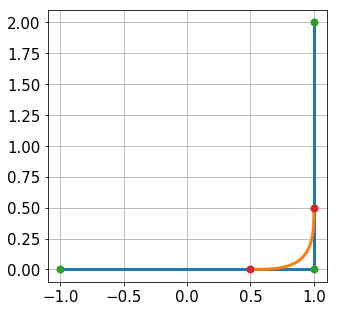

In [189]:
P0 = np.array([-1,0])
P1 = np.array([1,0])
P2 = np.array([1,2])

P = np.array([P0,P1,P2])

delta = 1/2;

Pv = (P0-P1)/(la.norm(P0-P1))*delta+P1
Pn = (P2-P1)/(la.norm(P2-P1))*delta+P1

Ps = np.array([Pv,Pn])

theta_v = (P1-P0)/la.norm(P1-P0)
theta_n = (P2-P1)/la.norm(P2-P1)

kappa_v = np.array([0,0])
kappa_n = np.array([0,0])

Tau0 = 0
Tau1 = 1

A = np.array([[1,Tau0**1,Tau0**2,Tau0**3,Tau0**4,Tau0**5],
              [1,Tau1**1,Tau1**2,Tau1**3,Tau1**4,Tau1**5],
              [0,1,2*Tau0**1,3*Tau0**2,4*Tau0**3,5*Tau0**4],
              [0,1,2*Tau1**1,3*Tau1**2,4*Tau1**3,5*Tau1**4],
              [0,0,2,6*Tau0**1,12*Tau0**2,20*Tau0**3],
              [0,0,2,6*Tau1**1,12*Tau1**2,20*Tau1**3]])

B = np.array([Pv,Pn,theta_v,theta_n,kappa_v,kappa_n])

C = np.flip(np.transpose(np.dot(la.pinv(A),B)),1)

tau = np.linspace(0,1,num=1000)

f = np.array([np.polyval(C[0,:],tau),np.polyval(C[1,:],tau)])

plt.rcParams['figure.figsize'] = (5,5)
ax = plt.subplot(111)
ax.plot(P[:,0], P[:,1],linewidth=3.0,label="Kontur")
ax.plot(f[0,:], f[1,:],linewidth=3.0,label="Überschleifkurve")
ax.plot(P[:,0], P[:,1],linewidth=3.0,marker='o',linestyle = 'None', markersize = 7)
ax.plot(Ps[:,0], Ps[:,1],linewidth=3.0,marker='o',linestyle = 'None', markersize = 7)
ax.grid()


# Aufgabe 4

# Aufgabe 5

# Aufgabe 6

# Aufgabe 7